# Exploratory Data Analysis
## Ryan Jenkinson & Éanna Morley

The purpose of this notebook will be to look at the distribution of scores and decide appropriate score thresholds for our dataset

### Import Key Dependencies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white", palette="colorblind", color_codes=True)

In [2]:
print(sns.__version__)
assert sns.__version__ == '0.9.0' #Ensures we can use sns.scatterplot below

0.9.0


### Load our cleaned dataset
This has been generated from make_jokes_dataset_CLEAN.py and creates the clean jokes dataset (removing special characters, ensuring the punchline and setup have a maximum wordcount etc). Note that the jokes are not clean in the classical sense of the word!

In [50]:
df1 = pd.read_csv('../data/processed_data/jokes_dataset_CLEAN.csv')
df1 = df1.iloc[:,1:]
df1.insert(loc=0,column='datetime',value='Not given')

# df2 = pd.read_csv('../data/processed_data/scraped_data_v1_CLEAN.csv')
# df2 = df2.iloc[:,2:]

In [61]:
# df = pd.concat([df1,df2])

# df = pd.read_csv('data/scraped_data_v2.csv')
# df = df.iloc[:,2:]
print(len(df))
# Drop duplicates with the same ID
df = df.drop_duplicates('id') 
print(len(df))
# Catch any jokes posted under different id's but with the same body/title
df = df.drop_duplicates('body')
df = df.drop_duplicates('title')

1003
1003


In [63]:
'[removed]' in ['[removed]','[deleted]']

True

In [29]:
df.body = df.body.astype('str')
df.title = df.title.astype('str')

In [52]:
df.head()

,datetime,body,id,score,title
0,Not given,Pizza doesn't scream when you put it in the ov...,5tz4dd,0,What's the difference between a Jew in Nazi Ge...
1,Not given,He got caught trying to sell the two books to ...,5tz1pc,0,You hear about the University book store worke...
2,Not given,Because the p is silent.,5tz1o1,0,Why is it unknown on how pterodactyls urinate ...
3,Not given,To avoid leaving tracks like a snail while wal...,5tz0ef,0,Why women need legs?
4,Not given,Character actors!,5tz02q,0,How did TV studios make words appear on screen...


In [56]:
df.body[2].split(' ')

['Because', 'the', 'p', 'is', 'silent.']

In [57]:
df['body_length'] = [len(df.body[i].split(' ')) for i in range(df.shape[0])]
df['title_length'] = [len(df.title[i].split(' ')) for i in range(df.shape[0])]

AttributeError: 'Series' object has no attribute 'split'

In [48]:
df.describe()

,score
count,115701.000000
mean,153.661256
std,1506.146370
min,0.000000
25%,0.000000
50%,5.000000
75%,25.000000
max,74636.000000


In [34]:
print("The number of jokes with score 0 is:",len(df[df["score"] == 0]))

The number of jokes with score 0 is: 0


In [35]:
# Look at the distribution of jokes between a maximum and minimum score
min_score = 5
max_score = 2000
df = df[(min_score <= df["score"]) & (df["score"] <= max_score)]

In [36]:
df.describe()

,score,body_length
count,45687.000000,45687.000000
mean,112.727078,5.504235
std,240.164435,2.663384
min,11.000000,1.000000
25%,17.000000,3.000000
50%,32.000000,5.000000
75%,85.000000,8.000000
max,1998.000000,61.000000


AttributeError: 'DataFrame' object has no attribute 'title_length'

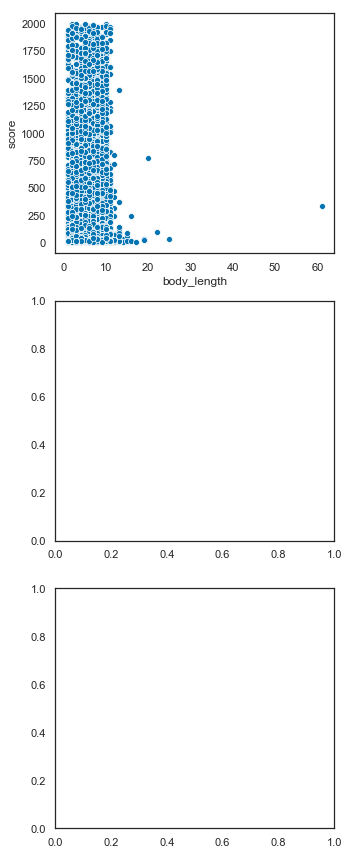

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(5,15))

sns.scatterplot(df.body_length, df.score, ax=ax1)
sns.scatterplot(df.title_length, df.score, ax=ax2)
sns.scatterplot(df.title_length, df.body_length, ax=ax3)

ax1.set_title('Score v Body Length')
ax2.set_title('Score v Title Length')
ax3.set_title('Body Length v Title Length')

ax1.set(xlabel='Body Length', ylabel='Score')
ax2.set(xlabel='Title Length', ylabel='Score')
ax3.set(xlabel='Title Length', ylabel='Body Length')

#fig.savefig('plots/scatter_plots.png', dpi=300, bbox_inches='tight')

C:\Users\Ryan Jenkinson\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: 'DataFrame' object has no attribute 'body_length'

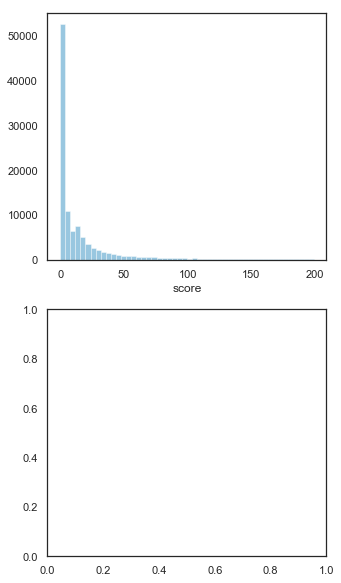

In [49]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(5,10))

sns.distplot(df.score[df.score < 200], kde=False, ax=ax1)
sns.distplot(df.body_length[df.body_length<300], kde=False, label='body', ax=ax2)
sns.distplot(df.title_length, kde=False, label='title', ax=ax2)

ax1.set_title('Distribution of Scores')
ax2.set_title('Distribution of Joke Lengths')
ax1.set(xlabel='Score')
ax2.set(xlabel='Joke Length')
plt.legend()

#fig.savefig('plots/histograms.png', dpi=300, bbox_inches='tight')

### Map scores
In this section we will be "compressing" the dataset between a certain range. To do this, we pick a certain value, and then linearly interpolate from this value up until the max_score and compress this large interval onto a smaller one. E.g we take the scores from 200 -> 2000 and linearly interpolate them so that they are in the range 200 -> 250

In [39]:
map_score_range = [200,250] # This will define where we start thresholding our scores and using our mapping
temp_df = df[(map_score_range[0] <= df["score"]) & (df["score"] <= max_score)]

# Map range using linear interpolation
temp_df["score"] = (map_score_range[0] + (map_score_range[1] - map_score_range[0])*
                    ((temp_df["score"] - 200) / (max_score - 200))).astype('int') 

C:\Users\Ryan Jenkinson\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
temp_df.head()

,datetime,body,id,score,title,body_length
3,1_1_2012,He wipes his ass.,nyx9s,202,What does a cannibal do after he dumps his gir...,4
11,1_1_2012,Roberto,o11xc,201,What do you call a mexican with a rubber toe?,1
12,1_1_2012,Cock.,o27ip,202,What does a gay horse eat?,1
21,1_1_2012,Phelps can finish a race!,o5muo,201,What's the difference between Hitler and Micha...,5
29,1_1_2012,Americans don't get them.,o6njo,207,What's the similarity between free healthcare ...,4


In [41]:
# Combine the dataframe with jokes <= map_score_range[0] with the temp_df, sample them to "shuffle them" and reset index
df = pd.concat([df.drop(temp_df.index),temp_df]).sample(frac=1).reset_index(drop=True)

In [42]:
df.head()

,datetime,body,id,score,title,body_length
0,13_10_2016,Completely irrational.,58k61o,118,My girlfriend is like Pi.,2
1,12_9_2016,I loved listening to music with him.,53lcob,31,I miss my friend jack...,7
2,16_2_2015,It doesn't need cleaning,2xvbtt,11,Why haven't we sent a woman to the moon?,4
3,8_5_2018,"Sadly, I was also fired from the aquarium.",8jguob,15,TIL that a school of piranhas are able to stri...,8
4,1_1_2017,-John F. Kennedy,5mb54t,27,"""Sometimes you just need to go for a drive to ...",3


C:\Users\Ryan Jenkinson\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: 'DataFrame' object has no attribute 'title_length'

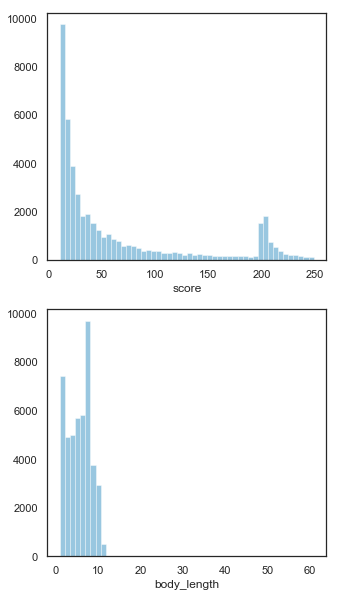

In [43]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(5,10))

sns.distplot(df.score, kde=False, ax=ax1)
sns.distplot(df.body_length[df.body_length<300], kde=False, label='body', ax=ax2)
sns.distplot(df.title_length, kde=False, label='title', ax=ax2)

ax1.set_title('Distribution of Scores')
ax2.set_title('Distribution of Joke Lengths')
ax1.set(xlabel='Score')
ax2.set(xlabel='Joke Length')
plt.legend()

#fig.savefig('plots/histograms.png', dpi=300, bbox_inches='tight')